# QuTiP: Quantum optics Toolbox in Python

Q: Did you successfully install QuTiP?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

## States

$|n\rangle$

In [60]:
basis(10, 0)

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

States are represented as ket vectors (column vectors)

In [3]:
# Fundamental basis states (Fock states of oscillator modes)

N = 2  # number of states in the Hilbert space
n = 1  # the state that will be occupied

basis(N, n)  # equivalent to fock(N, n)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

Here, `N` is the dimension of the Hilbert space to be kept and `n` is the index of the state that will be occupied.

### Coherent State

$\hat{a}|\alpha\rangle = \alpha |\alpha\rangle$

In [61]:
# a coherent state
coherent(N=10, alpha=1.0)

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[0.60653066]
 [0.60653066]
 [0.42888194]
 [0.24761511]
 [0.12380753]
 [0.0553686 ]
 [0.02260303]
 [0.00854887]
 [0.00299672]
 [0.00110007]]

Q: check that the equation
$$|\alpha\rangle = e^{-|\alpha|^2/2}\sum_{n=0}^{\infty} \frac{\alpha^n}{\sqrt{n!}}|n\rangle $$
is valid.

Q: how do we express bra vectors (row vectors) in QuTiP?

`.dag()` method performs dagger operation on the state vectors

In [14]:
psi = basis(2, 1)
psi.dag()

Quantum object: dims = [[1], [2]], shape = (1, 2), type = bra
Qobj data =
[[0. 1.]]

In [64]:
alpha = coherent(10, 1)
alpha.dag()

Quantum object: dims = [[1], [10]], shape = (1, 10), type = bra
Qobj data =
[[0.60653066 0.60653066 0.42888194 0.24761511 0.12380753 0.0553686
  0.02260303 0.00854887 0.00299672 0.00110007]]

### Density Matrix

$$\rho = \sum_{i} p_i |\psi_i\rangle \langle \psi_i |$$

Fock state density matrix: $\rho = |n\rangle \langle n|$

In [15]:
# a fock state as density matrix
fock_dm(5, 2)  # 5 = hilbert space size, 2 = state that is occupied

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

In [66]:
# alternative method to generate a density matrix :
basis(5, 2) * basis(5, 2).dag()

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

In [18]:
# coherent state as density matrix
coherent_dm(N=8, alpha=1.0)

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[3.67879439e-01 3.67879455e-01 2.60129900e-01 1.50187300e-01
  7.50858773e-02 3.36199110e-02 1.35485515e-02 5.77267786e-03]
 [3.67879455e-01 3.67879470e-01 2.60129911e-01 1.50187306e-01
  7.50858804e-02 3.36199124e-02 1.35485520e-02 5.77267810e-03]
 [2.60129900e-01 2.60129911e-01 1.83939513e-01 1.06198399e-01
  5.30937031e-02 2.37728537e-02 9.58026722e-03 4.08189737e-03]
 [1.50187300e-01 1.50187306e-01 1.06198399e-01 6.13141770e-02
  3.06539153e-02 1.37253761e-02 5.53121524e-03 2.35670388e-03]
 [7.50858773e-02 7.50858804e-02 5.30937031e-02 3.06539153e-02
  1.53253712e-02 6.86197771e-03 2.76532136e-03 1.17822997e-03]
 [3.36199110e-02 3.36199124e-02 2.37728537e-02 1.37253761e-02
  6.86197771e-03 3.07246966e-03 1.23818035e-03 5.27555757e-04]
 [1.35485515e-02 1.35485520e-02 9.58026722e-03 5.53121524e-03
  2.76532136e-03 1.23818035e-03 4.98976640e-04 2.12600691e-04]
 [5.77267786e-03 5.77267810e-03 4.0

#### Thermal State
$$\rho = \sum_{n} \frac{\bar{n}^n}{(1 + \bar{n})^{n+1}}|n\rangle \langle n |$$

In [20]:
# thermal state
n = 1  # average number of thermal photons
thermal_dm(8, n)

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.50196078 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.25098039 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.1254902  0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.0627451  0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.03137255 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.01568627
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00784314 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.00392157]]

## Operators

### Qubit (two-level system) operators: $\hat{\sigma}_x$,  $\hat{\sigma}_y$,  $\hat{\sigma}_z$

In [68]:
# Pauli sigma x
sigmax()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [69]:
# Pauli sigma y
sigmay()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [70]:
# Pauli sigma z
sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

### Harmonic Oscillator operaters

$\hat{a}$

In [24]:
#  annihilation operator

destroy(N=8)  # N = number of fock states included in the Hilbert space

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.41421356 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         1.73205081 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         2.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         2.23606798
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.44948974 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         2.64575131]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]

In [25]:
# creation operator

create(N=8)  # equivalent to destroy(5).dag()

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         1.41421356 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.73205081 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         2.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         2.23606798 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         2.44948974
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.64575131 0.        ]]

In [71]:
a = destroy(N = 8)
a.dag()

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         1.41421356 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.73205081 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         2.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         2.23606798 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         2.44948974
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.64575131 0.        ]]

In [73]:
# photon number operator
n = a.dag() * a
n

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 0. 0. 0.]
 [0. 0. 0. 0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0. 0. 6. 0.]
 [0. 0. 0. 0. 0. 0. 0. 7.]]

#### Position Operator
$$\hat{x} = \sqrt{\frac{\hbar}{2m\omega}}({\hat{a} + \hat{a}^\dagger})$$

In [74]:
# the position operator is easily constructed from the annihilation operator
a = destroy(8)

x = (a + a.dag())/ np.sqrt(2)

x

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.         0.70710678 0.         0.         0.         0.
  0.         0.        ]
 [0.70710678 0.         1.         0.         0.         0.
  0.         0.        ]
 [0.         1.         0.         1.22474487 0.         0.
  0.         0.        ]
 [0.         0.         1.22474487 0.         1.41421356 0.
  0.         0.        ]
 [0.         0.         0.         1.41421356 0.         1.58113883
  0.         0.        ]
 [0.         0.         0.         0.         1.58113883 0.
  1.73205081 0.        ]
 [0.         0.         0.         0.         0.         1.73205081
  0.         1.87082869]
 [0.         0.         0.         0.         0.         0.
  1.87082869 0.        ]]

In [76]:
x.dag() == x

True

#### Momentum Operator
$$\hat{p} =-i \sqrt{\frac{\hbar m\omega}{2}}({\hat{a} - \hat{a}^\dagger})$$

In [77]:
# the momentum operator is easily constructed from the annihilation operator
p = (a - a.dag())/ np.sqrt(2) / 1j

p

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.+0.j         0.-0.70710678j 0.+0.j         0.+0.j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.70710678j 0.+0.j         0.-1.j         0.+0.j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+1.j         0.+0.j         0.-1.22474487j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+1.22474487j 0.+0.j
  0.-1.41421356j 0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+1.41421356j
  0.+0.j         0.-1.58113883j 0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+1.58113883j 0.+0.j         0.-1.73205081j 0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+1.73205081j 0.+0.j         0.-1.87082869j]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+0

#### Commutation Relation

$$[\hat{a}, \hat{a}^\dagger] = 1 $$

In [29]:
commutator(a, a.dag())

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -7.]]

-7 at the lower diagonal is due to the truncated Hilbert space

In [81]:
a = destroy(10000)
%timeit commutator(a, a.dag())

1.47 ms ± 87.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Sparse Matrix

In [82]:
a = destroy(100)
%timeit commutator(a, a.dag())

344 µs ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


$$[\hat{x}, \hat{p}] = i\hbar $$

In [85]:
1j

1j

In [84]:
commutator(x, p)

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-7.j]]

#### Pauli spin inequalities
$$[\hat{\sigma}_x, \hat{\sigma}_y] = 2i\hat{\sigma}_z$$

In [86]:
commutator(sigmax(), sigmay()) - 2j * sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 0.]]

$$-i\hat{\sigma}_x\hat{\sigma}_y\hat{\sigma}_z = 1$$

In [87]:
-1j * sigmax() * sigmay() * sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

$$\hat{\sigma}_x^2 = \hat{\sigma}_y^2 = \hat{\sigma}_z^2 = 1$$

In [88]:
qeye(10)

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

In [89]:
sigmax() ** 2 == sigmay() ** 2 == sigmaz() ** 2 == qeye(2)

True

## Composite systems

In most cases we are interested in coupled quantum systems, for example coupled qubits, a qubit coupled to a cavity (oscillator mode), etc.

To define states and operators for such systems in QuTiP, we use the `tensor` function to create `Qobj` instances for the composite system.

For example, consider a system composed of two qubits. If we want to create a Pauli $\sigma_z$
 operator that acts on the first qubit and leaves the second qubit unaffected (i.e., the operator $\sigma_z\otimes1$
), we would do:

In [90]:
sz1 = tensor(sigmaz(), qeye(2))

sz1

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0. -1.]]

We can easily verify that this two-qubit operator does indeed have the desired properties:
$$|\psi_1\rangle = |1\rangle \otimes |0\rangle$$
$$|\psi_2\rangle = |0\rangle \otimes |1\rangle$$

In [91]:
psi1 = tensor(basis(N, 1), basis(N, 0))  # excited first qubit
psi2 = tensor(basis(N, 0), basis(N, 1))  # excited second qubit

In [101]:
tensor(basis(N, 1), basis(N, 1)) 

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]]

In [103]:
# this should not be true,
# because sz1 should flip the sign of the excited state of psi1
sz1 * psi1 == - psi1

True

In [36]:
# this should be true, because sz1 should leave psi2 unaffected
sz1 * psi2 == psi2

True

Above we used the `qeye(N)` function, which generates the identity operator with `N` quantum states. If we want to do the same thing for the second qubit we can do:

In [37]:
sz2 = tensor(qeye(2), sigmaz())

sz2

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]

In [105]:
tensor(sigmax(), sigmax(), sigmax())

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]

In [114]:
# 10 pauli x operators multiplied together
tensor([sigmax() for n in range(10)])

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (1024, 1024), type = oper, isherm = True
Qobj data =
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]

Note the order of the argument to the tensor function, and the correspondingly different matrix representation of the two operators `sz1` and `sz2`.

Using the same method we can create coupling terms of the form $\sigma_x\otimes\sigma_x$:

In [38]:
tensor(sigmax(), sigmax())

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

#### Coupled 2-qubit Hamiltonian

Now we are ready to create a `Qobj` representation of a coupled two-qubit Hamiltonian: 
$$\hat{H} = \frac{\epsilon_1}{2} \hat{\sigma}_z^{(1)} + \frac{\epsilon_2}{2} \hat{\sigma}_z^{(2)} + g \hat{\sigma}_x^{(1)} \hat{\sigma}_x^{(2)}$$


In [115]:
epsilon = [1.0, 1.0]
g = 0.1

sz1 = tensor(sigmaz(), qeye(2))
sz2 = tensor(qeye(2), sigmaz())

H = epsilon[0]/2 * sz1 + epsilon[1]/2 * sz2 + g * tensor(sigmax(), sigmax())

H

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.   0.   0.   0.1]
 [ 0.   0.   0.1  0. ]
 [ 0.   0.1  0.   0. ]
 [ 0.1  0.   0.  -1. ]]

In [116]:
H.eigenenergies()

array([-1.00498756, -0.1       ,  0.1       ,  1.00498756])

In [117]:
H.eigenstates()

(array([-1.00498756, -0.1       ,  0.1       ,  1.00498756]),
 array([Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
        Qobj data =
        [[ 0.0498137 ]
         [ 0.        ]
         [ 0.        ]
         [-0.99875853]]                                                    ,
        Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
        Qobj data =
        [[ 0.        ]
         [-0.70710678]
         [ 0.70710678]
         [ 0.        ]]                                                    ,
        Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
        Qobj data =
        [[ 0.        ]
         [-0.70710678]
         [-0.70710678]
         [ 0.        ]]                                                    ,
        Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
        Qobj data =
        [[0.99875853]
         [0.        ]
         [0.        ]
         [0.0498137 ]]                            

#### Jaynes-Cummings Hamiltonian

the Jaynes-Cumming Hamiltonian for a qubit-cavity system:
$$\hat{H} = \omega_c \hat{a}^\dagger \hat{a} - \frac{\omega_a}{2} \hat{\sigma}_z + g (\hat{a}\hat{\sigma}_+ +\hat{a}^\dagger\hat{\sigma}_-)$$

In [118]:
wc = 1.0  # cavity frequency
wa = 1.0  # qubit/atom frenqency
g = 0.1  # coupling strength

# cavity mode operator
a = tensor(destroy(5), qeye(2))

# qubit/atom operators
sz = tensor(qeye(5), sigmaz())  # sigma-z operator
sm = tensor(qeye(5), destroy(2))  # sigma-minus operator

# the Jaynes-Cumming Hamiltonian
H = wc * a.dag() * a - 0.5 * wa * sz + g * (a * sm.dag() + a.dag() * sm)

H

Quantum object: dims = [[5, 2], [5, 2]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[-0.5         0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.5         0.1         0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.1         0.5         0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          1.5         0.14142136  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.14142136  1.5         0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          2.5
   0.17320508  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.17320508
   2.5         0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.   

## Unitary Evolution

Unitary evolution of a quantum system in QuTiP can be calculated with the `mesolve` function.

`mesolve` is short for Master-eqaution solve (for dissipative dynamics), but if no collapse operators (which describe the dissipation) are given to the solve it falls back on the unitary evolution of the Schrodinger (for initial states in state vector for) or the von Neuman equation (for initial states in density matrix form).

The evolution solvers in QuTiP returns a class of type `Odedata`, which contains the solution to the problem posed to the evolution solver.

For example, considor a qubit with Hamiltonian $H=\sigma_x$
 and initial state $∣1\rangle$
 (in the sigma-z basis): Its evolution can be calculated as follows:

In [119]:
mesolve?

In [137]:
# Hamiltonian
Omega_d = 2* np.pi * 0.1

H = Omega_d / 2 * sigmax()

# initial state
psi0 = basis(2, 1)

# list of times for which the solver should store the state vector
tlist = np.linspace(0, 10, 100)

result = mesolve(H, psi0, tlist, [], [])

In [138]:
2 * np.pi / Omega_d

10.0

In [139]:
result

Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0

In [140]:
result.states[-1]  # the finial state

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.-9.65622891e-06j]
 [-1.+0.00000000e+00j]]

In [141]:
# expectation value of sigma-z operator in the final state
expect(sigmaz(), result.states[-1])

-0.9999999998135145

In [142]:
# expectation value of sigma-z operator during the time evolution
expect(sigmaz(), result.states)

array([-1.        , -0.99798668, -0.99195482, -0.98192871, -0.96794873,
       -0.95007118, -0.92836803, -0.9029267 , -0.87384962, -0.84125387,
       -0.80527071, -0.76604504, -0.72373481, -0.67851037, -0.63055385,
       -0.58005834, -0.52722716, -0.47227306, -0.41541732, -0.35688886,
       -0.29692336, -0.23576228, -0.17365188, -0.11084227, -0.04758635,
        0.01586119,  0.07924486,  0.14230944,  0.204801  ,  0.26646792,
        0.32706188,  0.38633891,  0.44406031,  0.49999367,  0.55391375,
        0.60560346,  0.65485464,  0.70146899,  0.74525879,  0.78604774,
        0.82367157,  0.8579788 ,  0.88883127,  0.91610475,  0.93968942,
        0.95949031,  0.97542769,  0.98743738,  0.99547101,  0.99949624,
        0.99949685,  0.99547284,  0.98744042,  0.97543193,  0.95949574,
        0.939696  ,  0.91611246,  0.88884007,  0.85798866,  0.82368245,
        0.78605959,  0.74527157,  0.70148263,  0.6548691 ,  0.60561868,
        0.55392967,  0.50001021,  0.44407741,  0.3863565 ,  0.32

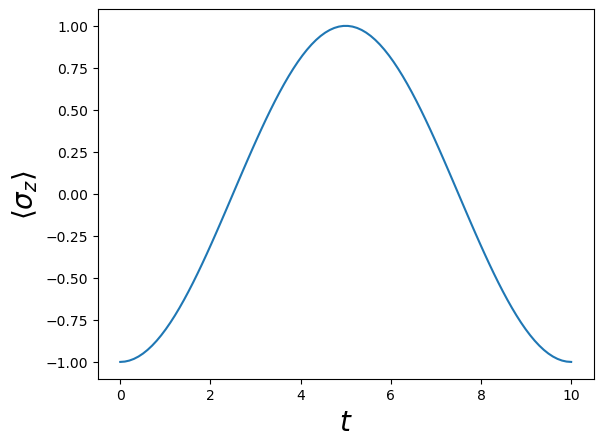

In [143]:
fig, axes = plt.subplots(1, 1)

axes.plot(tlist, expect(sigmaz(), result.states))

axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"$\left<\sigma_z\right>$", fontsize=20);

If we are only interested in expectation values, we could pass a list of operators to the `mesolve` function that we want expectation values for, and have the solver compute then and store the results in the `Odedata` class instance that it returns.

For example, to request that the solver calculates the expectation values for the operators σx,σy,σz
:

In [144]:
result = mesolve(H, psi0, tlist, [], [sigmax(), sigmay(), sigmaz()])

Now the expectation values are available in `result.expect[0]`, `result.expect[1]`, and `result.expect[2]`:

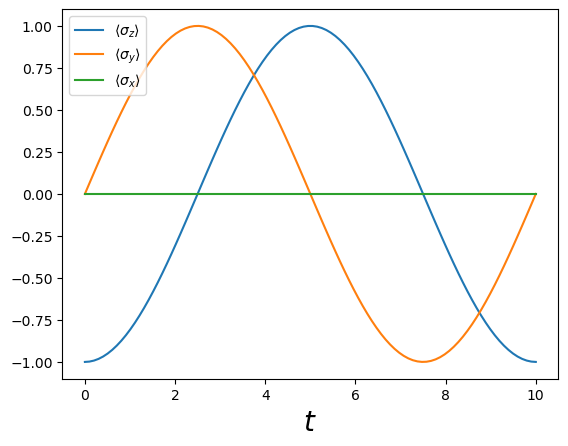

In [145]:
fig, axes = plt.subplots(1, 1)

axes.plot(tlist, result.expect[2], label=r"$\left<\sigma_z\right>$")
axes.plot(tlist, result.expect[1], label=r"$\left<\sigma_y\right>$")
axes.plot(tlist, result.expect[0], label=r"$\left<\sigma_x\right>$")

axes.set_xlabel(r"$t$", fontsize=20)
axes.legend(loc=2);

## Dissipative dynamics

To add dissipation to a problem, all we need to do is to define a list of collapse operators to the call to the `mesolve` solver.

A collapse operator is an operator that describes how the system is interacting with its environment.

For example, consider a quantum harmonic oscillator with Hamiltonian
$$H=\hbar \omega \hat{a}^\dagger \hat{a}$$
and which loses photons to its environment with a relaxation rate $\kappa$. The collapse operator that describes this process is $\sqrt{\kappa}\hat{a}$ since $\hat{a}$ is the photon annihilation operator of the oscillator.

To program this problem in QuTiP:

In [150]:
w = 1.0  # oscillator frequency
kappa = 0.1  # relaxation rate
a = destroy(10)  # oscillator annihilation operator
rho0 = coherent_dm(10, 1)  # initial state, coherent state with alpha = 1.0
H = w * a.dag() * a  # Hamiltonian

# A list of collapse operators
c_ops = [np.sqrt(kappa) * a]

In [161]:
tlist = np.linspace(0, 50, 100)

# request that the solver return the expectation value
# of the photon number state operator a.dag() * a
result = mesolve(H, rho0, tlist, c_ops, [a.dag() * a, (a + a.dag())/np.sqrt(2), -1j * (a - a.dag())/np.sqrt(2)])

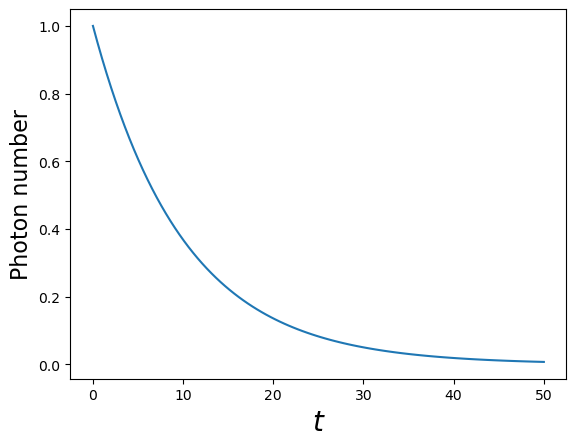

In [162]:
fig, axes = plt.subplots(1, 1)
axes.plot(tlist, result.expect[0])
axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"Photon number", fontsize=16);

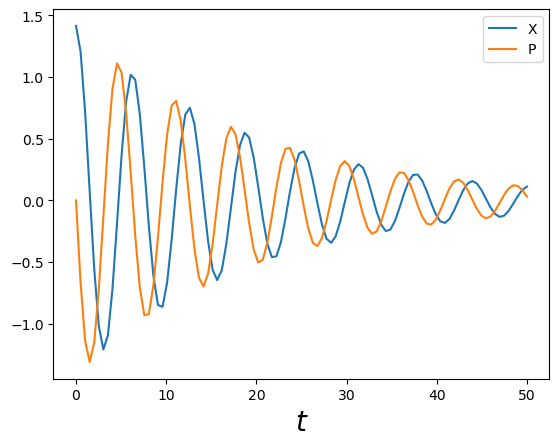

In [163]:
fig, axes = plt.subplots(1, 1)
axes.plot(tlist, result.expect[1], label = 'X')
axes.plot(tlist, result.expect[2], label = 'P')
axes.set_xlabel(r"$t$", fontsize=20)
axes.legend(loc = 0)
# axes.set_ylabel(r"Photon number", fontsize=16);

Text(0, 0.5, 'Y')

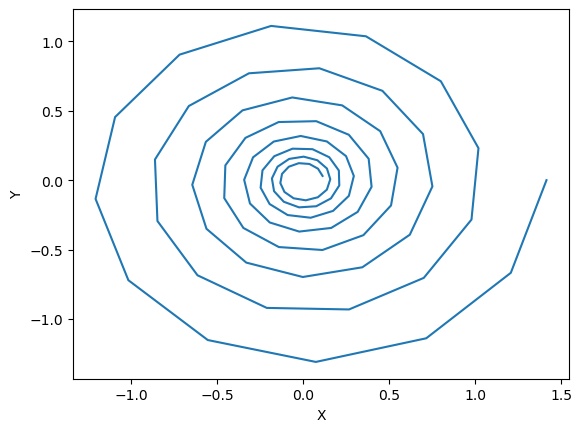

In [165]:
fig, axes = plt.subplots(1, 1)
axes.plot(result.expect[1], result.expect[2])
axes.set_xlabel('X')
axes.set_ylabel('Y')